# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor


## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')
df = df.fillna(0)
df.head(10)

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.0
1,user_1,62,28.0,0.0
2,user_1,62,28.0,0.0
3,user_1,62,28.0,0.0
4,user_1,62,28.0,0.0
5,user_1,62,28.0,0.0
6,user_10,20,89.0,0.0
7,user_10,20,89.0,0.0
8,user_10,20,89.0,0.0
9,user_10,20,89.0,0.0


In [3]:
X, y = df[['num_commits', 'pageviews']], df['AVG(diff)']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [5]:
def crossval(X, y, model_factory, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    test_rmse_list = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = model_factory()
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        rmse_train = root_mean_squared_error(y_train, train_pred)
        rmse_test = root_mean_squared_error(y_test, test_pred)

        test_rmse_list.append(rmse_test)
        print(f"train -  {rmse_train}   |   test -  {rmse_test}")

    avg_rmse = np.mean(test_rmse_list)
    print(f"Average RMSE on crossval is {avg_rmse}")
    return avg_rmse

In [6]:
crossval(X, y, lambda: LinearRegression())

train -  42.27291015233797   |   test -  70.43979397280242
train -  47.45726648237969   |   test -  30.657394014354043
train -  47.77854388604299   |   test -  27.13731937826911
train -  46.2441901620785   |   test -  44.12307205209637
train -  46.393550047422444   |   test -  42.420391728163665
train -  47.71541914802497   |   test -  28.273391654514054
train -  46.308918660456506   |   test -  45.67313727400561
train -  47.81194647242181   |   test -  20.57247658092342
train -  44.12915324532897   |   test -  63.14957718941946
train -  42.350893141368886   |   test -  74.15893330081012
Average RMSE on crossval is 44.66054871453583


np.float64(44.66054871453583)

In [7]:
crossval(X, y, lambda: DecisionTreeRegressor(max_depth=10, random_state=21))

train -  0.0   |   test -  71.88489835223467
train -  0.0   |   test -  25.24371208835975
train -  0.0   |   test -  0.0
train -  0.0   |   test -  20.293964620053917
train -  0.0   |   test -  72.20506003352149
train -  0.0   |   test -  28.991378028648448
train -  0.0   |   test -  7.0364255643204405
train -  0.0   |   test -  8.126236169698386
train -  0.0   |   test -  86.63649383194165
train -  0.0   |   test -  65.93049851867218
Average RMSE on crossval is 38.634866720745094


np.float64(38.634866720745094)

In [8]:
crossval(X, y, lambda: RandomForestRegressor(n_estimators=100, max_depth=25, random_state=21))

train -  12.777661106062592   |   test -  55.21884918830304
train -  14.944676960459738   |   test -  14.136950174002187
train -  15.145373082774338   |   test -  0.0
train -  14.781775951331486   |   test -  26.925919120802543
train -  12.998387321887547   |   test -  52.704000228872594
train -  15.162144682092565   |   test -  32.380540830875574
train -  16.39491297753858   |   test -  14.53373200141274
train -  14.98799883276986   |   test -  22.20654668271111
train -  14.09532647051205   |   test -  69.45674467575043
train -  15.002690750328759   |   test -  42.562647313312866
Average RMSE on crossval is 33.01259302160431


np.float64(33.01259302160431)

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

<Axes: xlabel='AVG(diff)'>

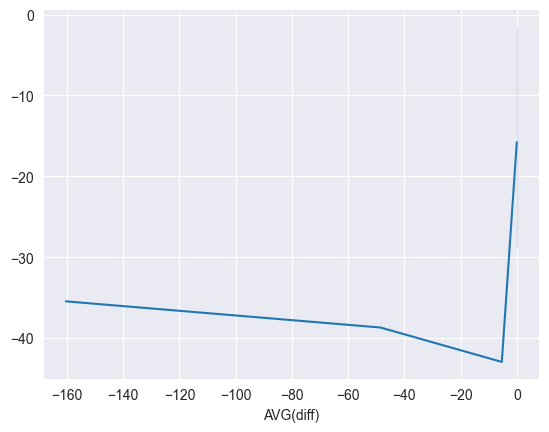

In [10]:
sns.lineplot(x=y_test, y=linear_preds)

In [11]:
tree_model = DecisionTreeRegressor(max_depth=10, random_state=21)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

<Axes: xlabel='AVG(diff)'>

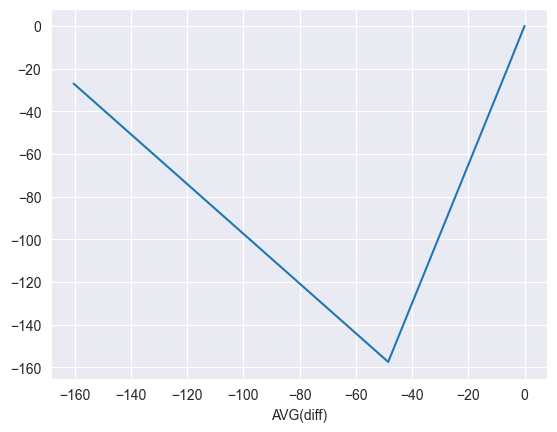

In [12]:
sns.lineplot(x=y_test, y=tree_preds)

In [13]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=21)
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)

<Axes: xlabel='AVG(diff)'>

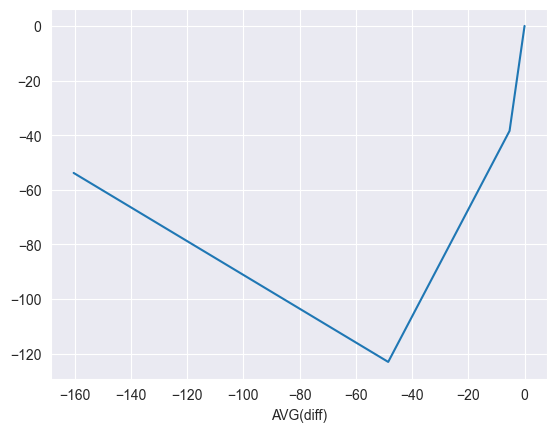

In [14]:
sns.lineplot(x=y_test, y=forest_preds)

plot for ideal case

<Axes: xlabel='AVG(diff)', ylabel='AVG(diff)'>

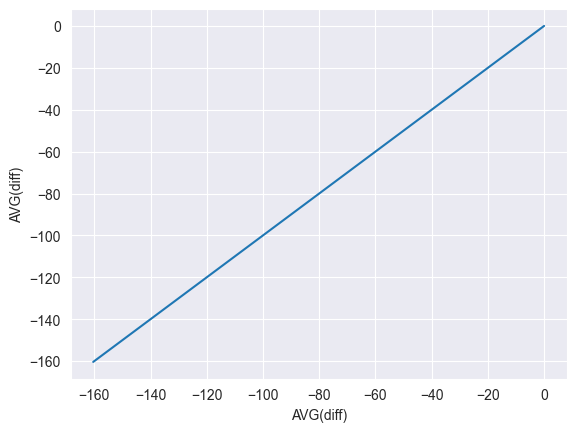

In [15]:
sns.lineplot(x=y_test, y=y_test)